<a href="https://colab.research.google.com/github/wenjunsun/personal-machine-learning-projects/blob/master/cancer-fracture/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this jupyter notebook I'll do exploratory data analysis on cancer and bone fractures datasets.

The dataset is collected by Emisa Nategh from U.W. Foster School of Business, who is an expert in cancer treatments and is trying to use ML to help predict which treatment is the most effective. 

I am currently her research assistant.

# 0. Go to the Dataset Directory

In [24]:
# I am doing this analysis on Colab, and my dataset is
# on the Google Drive. First step is for me to go
# to the directory the data is residing by mounting
# my drive.
cd drive/My\ Drive/fracture_with_emissa/Datasets/Raw\ Data

/content/drive/My Drive/fracture_with_emissa/Datasets/Raw Data


In [26]:
ls

BillingCodes.csv  Labs.csv            RadiationTherapy.csv  Symptoms.csv
BonyLesions.csv   Medications.csv     Signs.csv
Demographics.csv  MyelomaTherapy.csv  Stage.csv
Diagnoses.csv     PlasmaCells.csv     SurvivalDays.csv


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#1. Explore "BillingCodes.csv"

In [28]:
data = pd.read_csv('BillingCodes.csv')

In [29]:
data.head()

,ID,DaysFromDx,DxCodingMethod,DxCode,DxDescription,CCSLevel1Name,CCSLevel2Name,CCSLevel3Name
0,MM1,354,ICD9CM,V10.87,Personal history of malignant neoplasm of thyroid,Neoplasms,Cancer; other primary,Cancer of thyroid [36.]
1,MM1,373,ICD9CM,V10.87,Personal history of malignant neoplasm of thyroid,Neoplasms,Cancer; other primary,Cancer of thyroid [36.]
2,MM1,355,ICD9CM,V10.87,Personal history of malignant neoplasm of thyroid,Neoplasms,Cancer; other primary,Cancer of thyroid [36.]
3,MM1,741,ICD9CM,V12.29,"Personal history of other endocrine, metabolic...",Endocrine; nutritional; and metabolic diseases...,Other nutritional; endocrine; and metabolic di...,Other and unspecified metabolic; nutritional; ...
4,MM1,318,ICD9CM,V14.0,Personal history of allergy to penicillin,Symptoms; signs; and ill-defined conditions an...,Symptoms; signs; and ill-defined conditions,Allergic reactions [253.]


In [30]:
data.shape

(365055, 8)

In [32]:
data['DxCodingMethod'].unique()

array(['ICD9CM', 'ICD10CM'], dtype=object)

2 coding methods for the diagnosis. ICD stands for **International Classification of Diseases**. In the future might be good to find out what is the difference between the two

In [ ]:
len(data['DxCode'].unique())

6342

In [33]:
len(data['DxDescription'].unique())

5834

There are more codes of a disease than descriptions. Why? I thought each code is corresponding to one description. Maybe it is because ICD9 and ICD10 have some overlapping disease descriptions?

In [34]:
len(data[data['DxCodingMethod'] == 'ICD9CM']['DxCode'].unique())

3317

In [35]:
len(data[data['DxCodingMethod'] == 'ICD9CM']['DxDescription'].unique())

3223

In [38]:
len(data[data['DxCodingMethod'] == 'ICD10CM']['DxCode'].unique())

3025

In [37]:
len(data[data['DxCodingMethod'] == 'ICD10CM']['DxDescription'].unique())

3025

Okay, it seems like within ICD10 standard each code is matched with one description, but not in ICD9. I don't think this is super important detail for right now. Let's continue

Let's look at some of the diagnosis description.

In [39]:
for description in data['DxDescription'].unique()[:100]:
  print(description)

Personal history of malignant neoplasm of thyroid
Personal history of other endocrine, metabolic, and immunity disorders
Personal history of allergy to penicillin
Personal history of malignant melanoma of skin
Personal history of other malignant neoplasm of skin
Personal history of allergy to other specified medicinal agents
Personal history of irradiation, presenting hazards to health
Peripheral stem cells replaced by transplant
Other acquired absence of organ
Other postprocedural status
Encounter for antineoplastic chemotherapy
Encounter for change or removal of surgical wound dressing
Unspecified acquired hypothyroidism
Diabetes mellitus without mention of complication, type II or unspecified type, not stated as uncontrolled
Diabetes with other specified manifestations, type II or unspecified type, not stated as uncontrolled
Diabetes with unspecified complication, type II or unspecified type, not stated as uncontrolled
Hyperparathyroidism, unspecified
Hypoparathyroidism
Unspecified 

A whole bunch of diseases I don't know about. These seems not like a diagnosis but more like a medical notes by the doctor. "underweight" is a 
disease??...

In [40]:
for ccs in data['CCSLevel1Name'].unique()[:100]:
  print(ccs)

Neoplasms
Endocrine; nutritional; and metabolic diseases and immunity disorders
Symptoms; signs; and ill-defined conditions and factors influencing health status
Residual codes; unclassified; all E codes [259. and 260.]
Diseases of the blood and blood-forming organs
Diseases of the respiratory system
Diseases of the digestive system
Injury and poisoning
Diseases of the circulatory system
Diseases of the skin and subcutaneous tissue
Diseases of the musculoskeletal system and connective tissue
Infectious and parasitic diseases
Diseases of the nervous system and sense organs
Congenital anomalies
Mental Illness
Diseases of the genitourinary system
Certain conditions originating in the perinatal period
Complications of pregnancy; childbirth; and the puerperium
Mental illness


what is the most common CCSLevel1Name?

In [44]:
nameToFrequency = dict()
for ccs in data['CCSLevel1Name']:
  if ccs not in nameToFrequency:
    nameToFrequency[ccs] = 0
  nameToFrequency[ccs] += 1

In [48]:
sorted(nameToFrequency.items(), key=lambda item: item[1], reverse=True)

[('Neoplasms', 129322),
 ('Symptoms; signs; and ill-defined conditions and factors influencing health status',
  48672),
 ('Residual codes; unclassified; all E codes [259. and 260.]', 28674),
 ('Endocrine; nutritional; and metabolic diseases and immunity disorders',
  26931),
 ('Diseases of the musculoskeletal system and connective tissue', 19427),
 ('Diseases of the circulatory system', 17998),
 ('Diseases of the blood and blood-forming organs', 17361),
 ('Diseases of the nervous system and sense organs', 17217),
 ('Diseases of the digestive system', 16618),
 ('Diseases of the genitourinary system', 9081),
 ('Diseases of the respiratory system', 8975),
 ('Infectious and parasitic diseases', 8016),
 ('Injury and poisoning', 7255),
 ('Mental Illness', 4681),
 ('Diseases of the skin and subcutaneous tissue', 4351),
 ('Congenital anomalies', 345),
 ('Complications of pregnancy; childbirth; and the puerperium', 111),
 ('Certain conditions originating in the perinatal period', 12),
 ('Menta

As we can see, the most common CCSLevel1Name (which I don't know what that stands for), is Neoplasms, which is abnormal growth of tissue in some part of the body. It is a sympton of a cancer usually.

Note that we take many observations on a single patient, so this result is not indicative of how frequent this sympton exists within the patient population.

In [41]:
for ccs in data['CCSLevel2Name'].unique()[:100]:
  print(ccs)

Cancer; other primary
Other nutritional; endocrine; and metabolic disorders [58.]
Symptoms; signs; and ill-defined conditions
Cancer of skin
No Value
Maintenance chemotherapy; radiotherapy [45.]
Factors influencing health care
Thyroid disorders [48.]
Diabetes mellitus without complication [49.]
Diabetes mellitus with complications [50.]
Other endocrine disorders [51.]
Nutritional deficiencies [52.]
Disorders of lipid metabolism [53.]
Fluid and electrolyte disorders [55.]
Anemia
Cancer of lymphatic and hematopoietic tissue
Neoplasms of unspecified nature or uncertain behavior [44.]
Other lower respiratory disease [133.]
Other gastrointestinal disorders [155.]
Complications
Other hematologic conditions [64.]
Hypertension
Cancer of male genital organs
Diseases of white blood cells [63.]
Upper gastrointestinal disorders
Other inflammatory condition of skin [198.]
Spondylosis; intervertebral disc disorders; other back problems [205.]
Other skin disorders [200.]
Viral infection
Other nervous

As we can see, all the data from this csv file is texts. If we are going to use this dataset need to convert these texts for numbers. Can see there are variety of different diagnosis and patient medical history.

Upshot from this dataset is there are about 6000 diagnosis of particular diseases we recorded from patients, and Neoplasms seems to be a common characteristic among cancer patients.

# 2. Explore "Labs.csv"

In [49]:
data = pd.read_csv('Labs.csv')

In [53]:
data.head()

,ID,ObservationId,ObservationName,Panel,DaysFromDx,ObservationValueNumeric,Units,AbnormalFlags,LowerLimit,UpperLimit
0,MM1,P,Phosphate,Electrolyte,363,4,mg/dL,N,2.5,4.5
1,MM1,PLT,Platelet Count,Blood count,366,258,THOU/uL,N,150,400
2,MM1,ALK,Alkaline Phosphatase,Liver function,314,74,U/L,N,36,161
3,MM1,RDWCV,Red Blood Cell Distribution Width,Blood count,358,14.3,%,N,11.6,14.4
4,MM1,RDWCV,Red Blood Cell Distribution Width,Blood count,355,13.8,%,N,11.6,14.4


In [50]:
data.shape

(1178273, 10)

In [70]:
data.dtypes

ID                         object
ObservationId              object
ObservationName            object
Panel                      object
DaysFromDx                  int64
ObservationValueNumeric    object
Units                      object
AbnormalFlags              object
LowerLimit                 object
UpperLimit                 object
dtype: object

In [72]:
data.isnull().sum()

ID                         0
ObservationId              0
ObservationName            0
Panel                      0
DaysFromDx                 0
ObservationValueNumeric    0
Units                      0
AbnormalFlags              0
LowerLimit                 0
UpperLimit                 0
dtype: int64

We can see that ObservationValueNumeric is acutally an object, which it shouldn't be. Let's see what is going on here.

In [147]:
# return true if a string can be converted to a float
def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

In [151]:
# return True if a element in col can't be converted to float
def isNotFloat(col):
  return [True if not isfloat(x) else False for x in col]

In [152]:
# 's' can't be converted to float, which means
# the function above is doing a good job.
isNotFloat(['1.2', 's', '1'])

[False, True, False]

In [153]:
# Now let's look at the rows such that row's observationValue
# is not float
data[isNotFloat(data['ObservationValueNumeric'])]

,ID,ObservationId,ObservationName,Panel,DaysFromDx,ObservationValueNumeric,Units,AbnormalFlags,LowerLimit,UpperLimit
180,MM1,CDTPR,C. difficile PCR,Infectious disease,348,None detected,None,N,None detected,Detected
343,MM1,VZS,Varicella Zoster Antibody,Infectious disease,289,Detected,None,H,None detected,Detected
838,MM2,VZS,Varicella Zoster Antibody,Infectious disease,167,Detected,None,H,None detected,Detected
894,MM2,CDTPR,C. difficile PCR,Infectious disease,243,None detected,None,N,None detected,Detected
1725,MM3,VZS,Varicella Zoster Antibody,Infectious disease,247,Detected,None,H,None detected,Detected
...,...,...,...,...,...,...,...,...,...,...
1177914,MM838,REVMPV,Metapneumovirus PCR,Infectious disease,3747,None detected,None,N,None detected,Detected
1177925,MM838,REVRHN,Rhinovirus PCR,Infectious disease,4900,Detected,None,H,None detected,Detected
1178012,MM838,BSAB,Hepatitis B Surface Antibody,Infectious disease,2821,Detected,None,H,None detected,Detected
1178033,MM838,REVRHN,Rhinovirus PCR,Infectious disease,3748,None detected,None,N,None detected,Detected


We can see that some rows have **None detected** as its value!!!! This is certainly not what I expected. Seems like all the rows of Panel == Infectious Disease have this **detected** and **None detected** values for observation. A great insight to have in the future

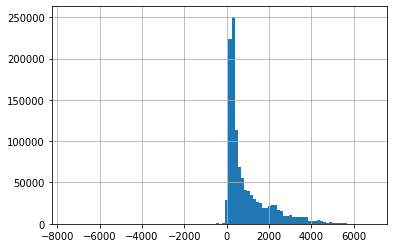

In [52]:
# histogram of days from diagnosis from all patients
# remember we take multiple data points on a single
# patient when that patient comes back again
data['DaysFromDx'].hist(bins = 100)

We can see roughly we have a lot of observatoins of patients early on when they are diagnosed, and less after 1000 - 2000 days of diagnosis. Maybe people focus on curing their diseases early on but after a while they just quit? I don't know

In [ ]:
data['Panel'].unique()

array(['Electrolyte', 'Blood count', 'Liver function', 'Kidney function',
       'Oncology', 'Infectious disease', 'Immune', 'Cardiac', 'Endocrine',
       'Nutrtion', 'Transplant'], dtype=object)

In [185]:
# Might be informative to plot time series of a patient's
# various blood counts and phosphate levels.
# let's write a function which will do that job.

def plotObservationTimeSeriesOfPatient(patientID, observationName):
  dataOfThisPatient = data[(data['ID'] == patientID) & 
                           (data['ObservationName'] == observationName)]
  if dataOfThisPatient.shape[0] == 0:
    # means dataframe is empty. then don't continue at all
    print(f'Patient {patientID} doesn\'t have {observationName} documented')
    return
  if dataOfThisPatient.shape[0] == 1:
    # this observation only has 1 record, which can't be plotted
    # as a time series
    return
  if dataOfThisPatient.iloc[0]['Panel'] == 'Infectious disease':
    print(f'{observationName} is a infectious disease, which doesn\'t have a time' +
          'series')
    return

  # convert numeric columns to float
  dataOfThisPatient['ObservationValueNumeric'] = \
      dataOfThisPatient['ObservationValueNumeric'].astype(float)

  dataOfThisPatient.sort_values(by = ['DaysFromDx'], inplace=True)

  plt.plot(dataOfThisPatient['DaysFromDx'], dataOfThisPatient['ObservationValueNumeric'])
  plt.title(f'time sereis of patient {patientID} of his/her {observationName} level')
  plt.xlabel('days from diagnosis')
  units = data.iloc[0]['Units'] # get the units of measurement
  plt.ylabel(f'{observationName}, Units: {units}')

  # plot lower limit and upper limit of this measurement
  # that is considered to be normal range
  lowerLimit = float(dataOfThisPatient.iloc[0]['LowerLimit'])
  upperLimit = float(dataOfThisPatient.iloc[0]['UpperLimit'])
  plt.hlines(lowerLimit, dataOfThisPatient.iloc[0]['DaysFromDx'], \
             dataOfThisPatient.iloc[-1]['DaysFromDx'], colors = 'r', \
             linestyles = 'dashed', label = 'lower limit of normal range')
  plt.hlines(upperLimit, dataOfThisPatient.iloc[0]['DaysFromDx'], \
             dataOfThisPatient.iloc[-1]['DaysFromDx'], colors = 'g', \
             linestyles = 'dashed', label = 'upper limit of normal range')
  # make the label of each horizontal lines visible
  plt.legend()
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


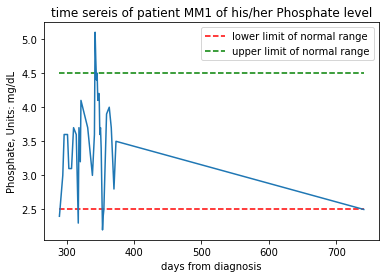

In [186]:
plotObservationTimeSeriesOfPatient('MM1', 'Phosphate')

In [192]:
# given a patient ID, plot all possible time series
# of his lab results.
def plotAllMeasurementsOfPatient(patientID):
  measurements = data[data['ID'] == patientID]['ObservationName'].unique()
  for measurement in measurements:
    plotObservationTimeSeriesOfPatient(patientID, measurement)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


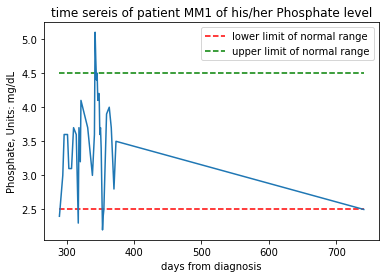

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


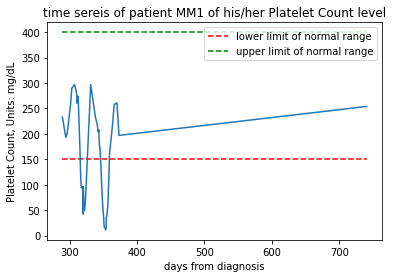

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


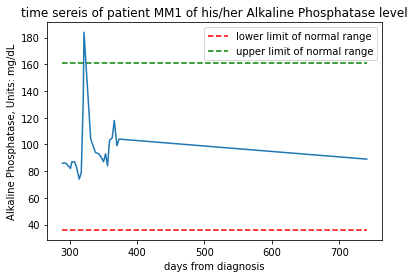

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


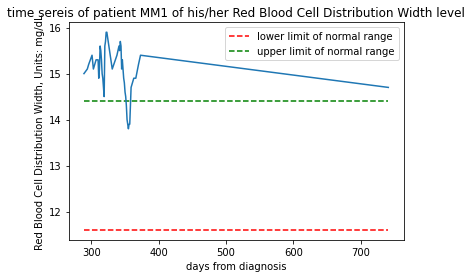

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


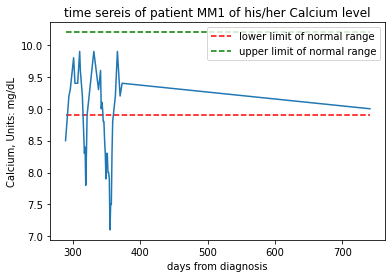

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


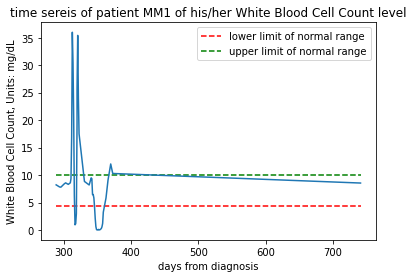

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


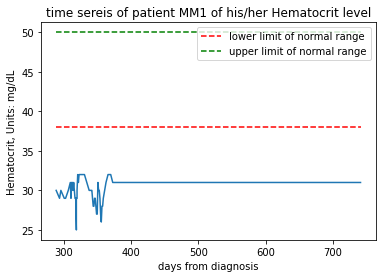

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


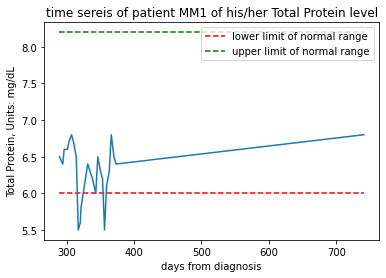

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


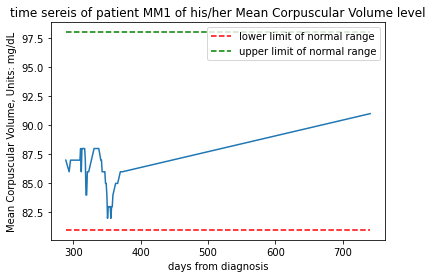

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


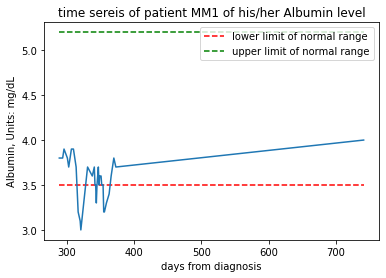

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


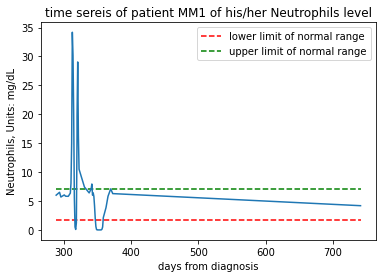

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


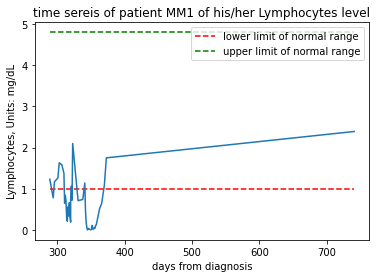

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


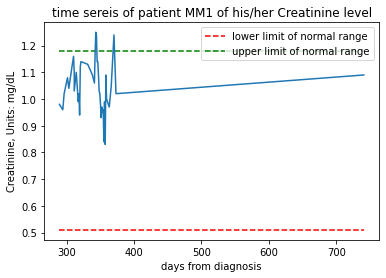

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


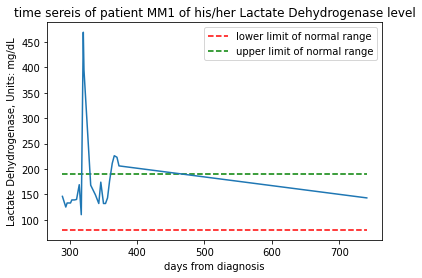

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


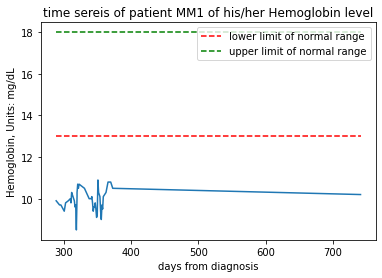

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


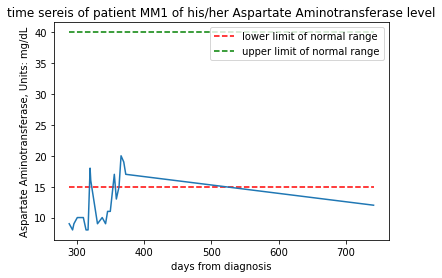

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


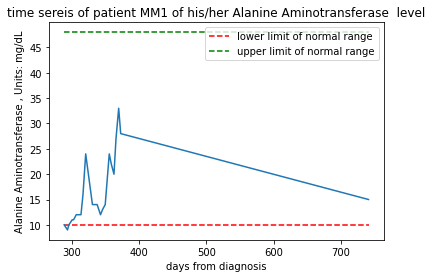

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


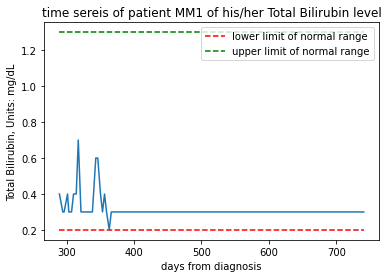

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


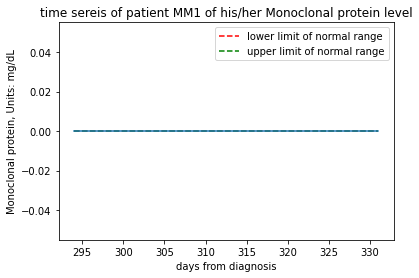

Cytomegalovirus PCR is a infectious disease, which doesn't have a timeseries


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


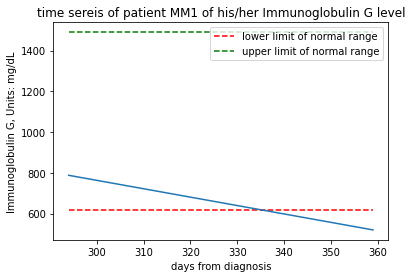

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


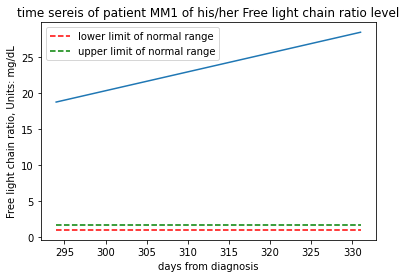

In [189]:
plotAllMeasurementsOfPatient(patientID = 'MM1')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


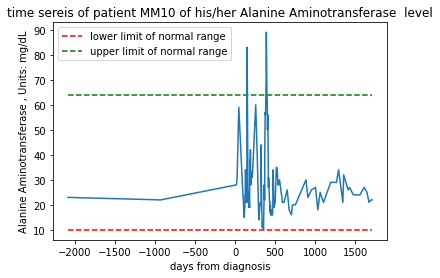

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


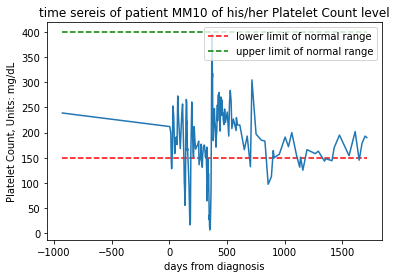

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


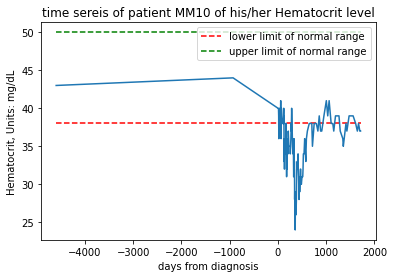

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


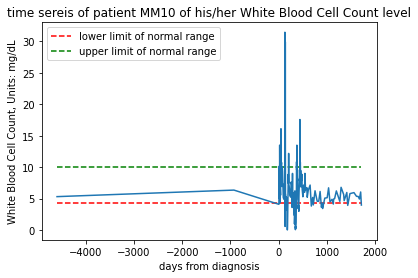

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


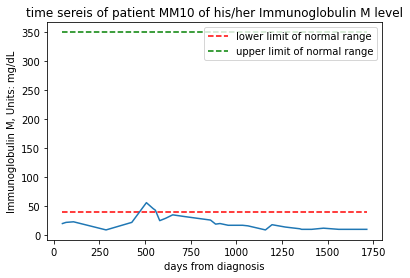

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


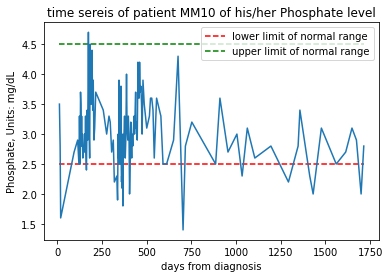

Coronavirus PCR is a infectious disease, which doesn't have a timeseries


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


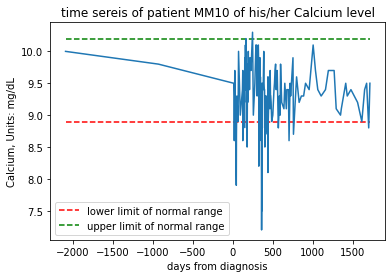

Influenza A PCR is a infectious disease, which doesn't have a timeseries


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


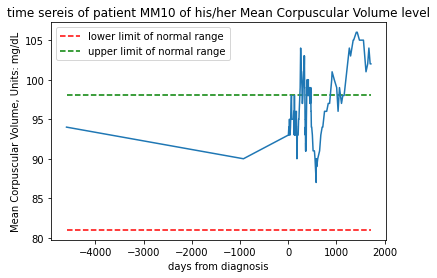

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


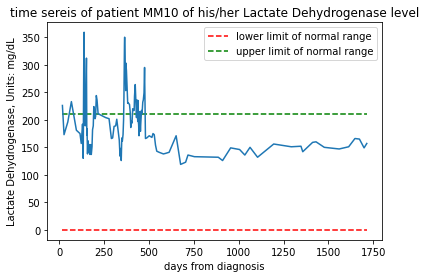

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


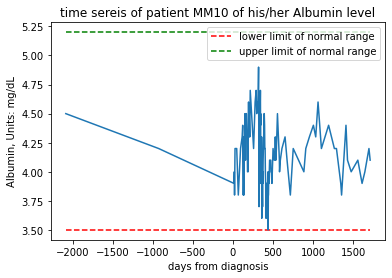

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


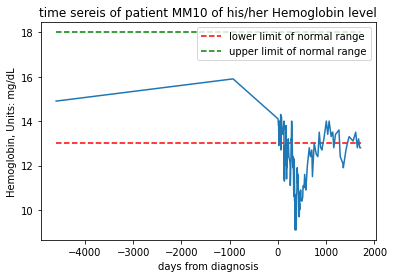

Bocavirus PCR is a infectious disease, which doesn't have a timeseries


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


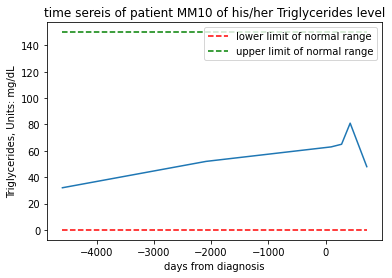

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


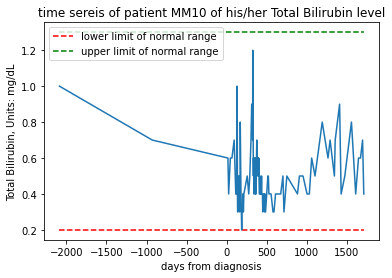

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


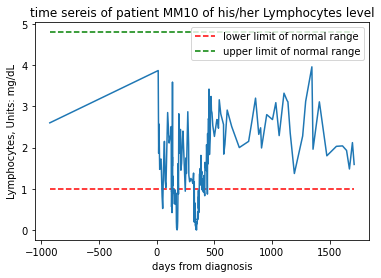

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


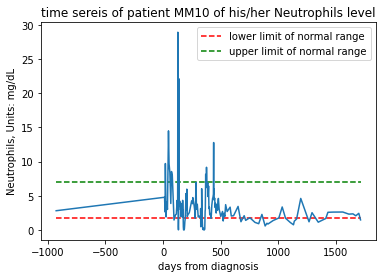

Parainfluenza 1 PCR is a infectious disease, which doesn't have a timeseries


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


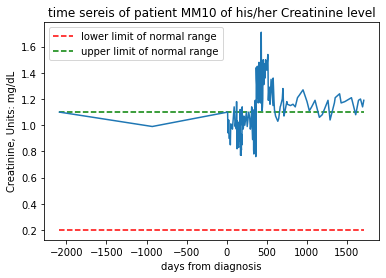

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


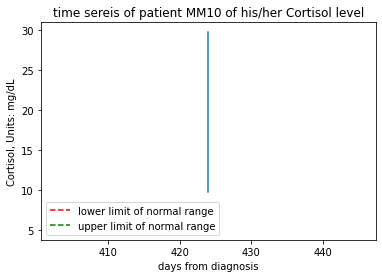

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


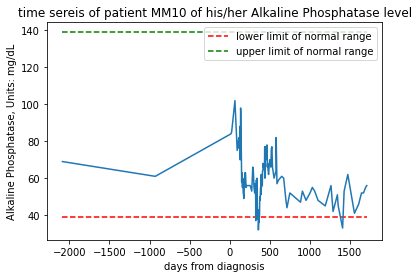

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


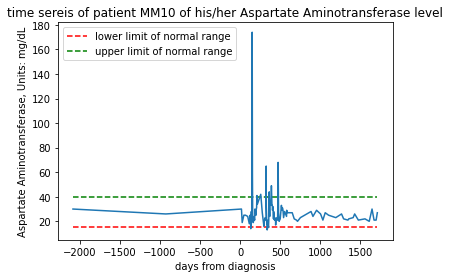

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


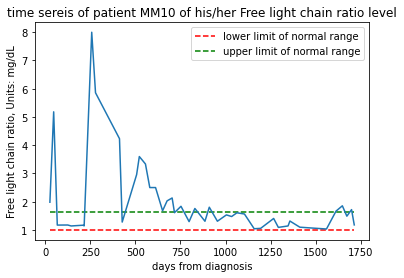

Respiratory Syncytial Virus PCR is a infectious disease, which doesn't have a timeseries


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


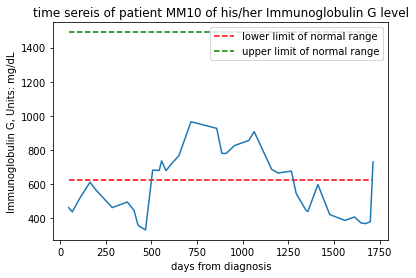

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


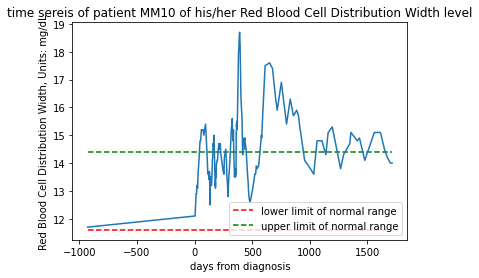

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


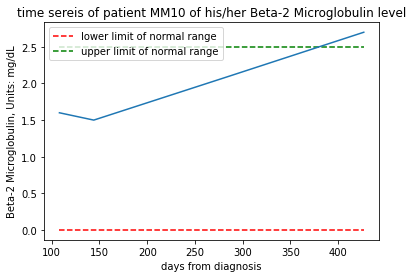

Influenza B PCR is a infectious disease, which doesn't have a timeseries


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


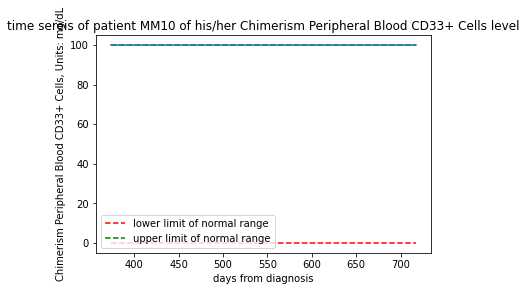

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


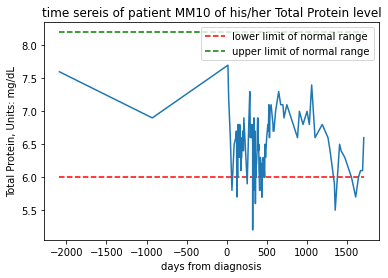

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


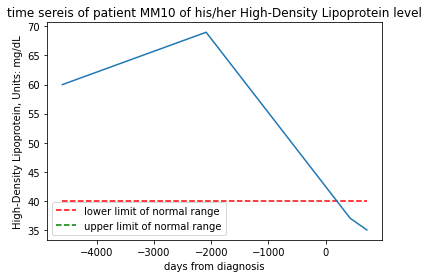

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


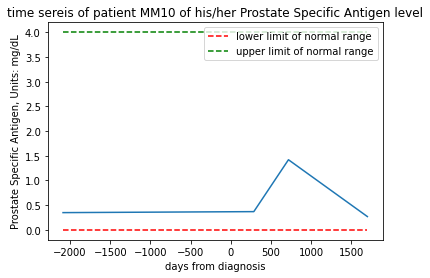

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


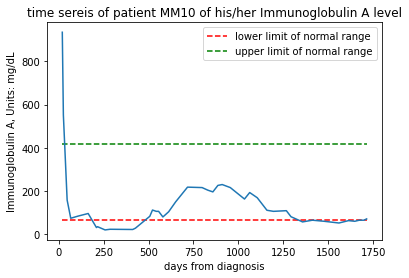

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


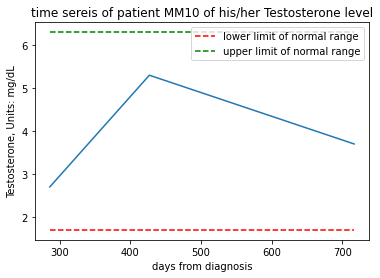

Parainfluenza 2 PCR is a infectious disease, which doesn't have a timeseries


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


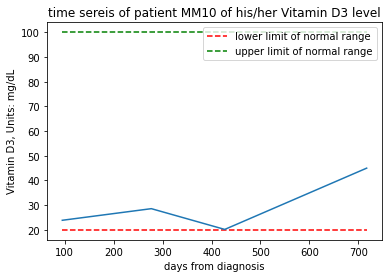

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


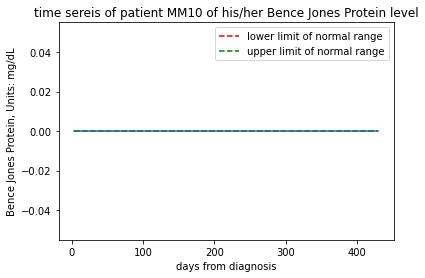

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


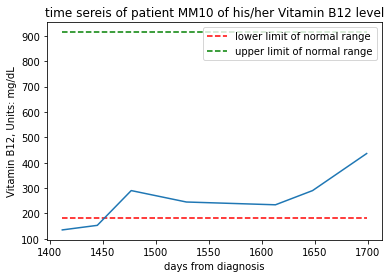

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


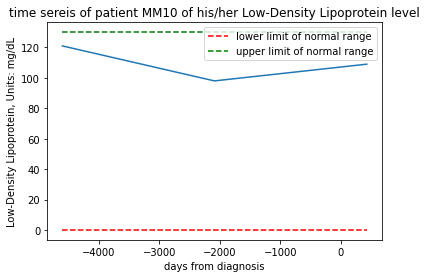

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


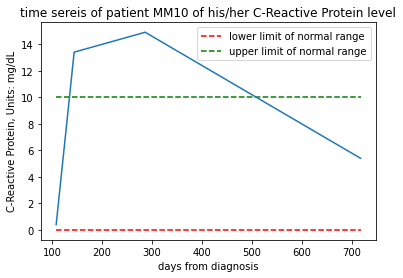

Rhinovirus PCR is a infectious disease, which doesn't have a timeseries
Parainfluenza 3 PCR is a infectious disease, which doesn't have a timeseries


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


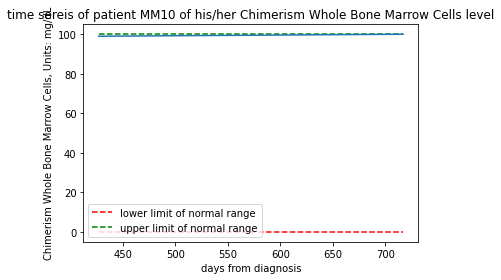

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


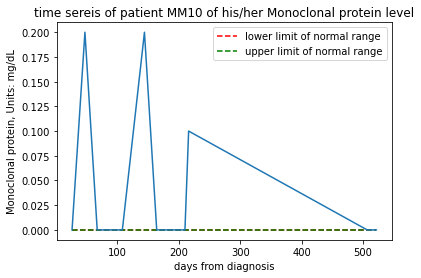

C. difficile PCR is a infectious disease, which doesn't have a timeseries
Quantiferon TB is a infectious disease, which doesn't have a timeseries
Norovirus type 1 is a infectious disease, which doesn't have a timeseries
Metapneumovirus PCR is a infectious disease, which doesn't have a timeseries
Parainfluenza 4 PCR is a infectious disease, which doesn't have a timeseries
Norovirus type 2 is a infectious disease, which doesn't have a timeseries
Norovirus type 4 is a infectious disease, which doesn't have a timeseries
Adenovirus PCR is a infectious disease, which doesn't have a timeseries
Varicella Zoster Antibody is a infectious disease, which doesn't have a timeseries


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


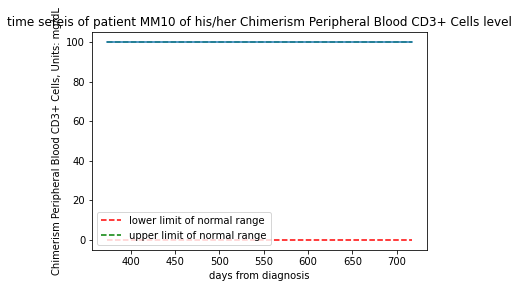

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


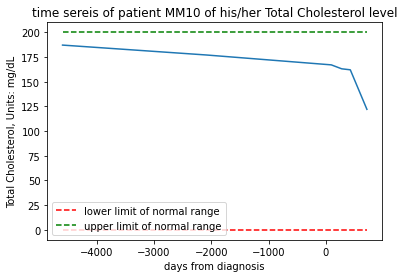

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


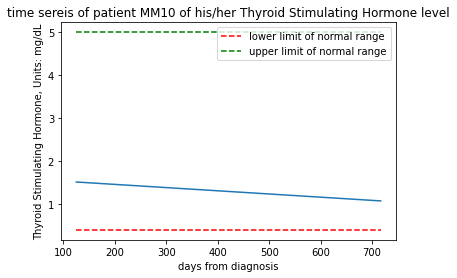

In [193]:
# plot all lab results time series of patient MM10
plotAllMeasurementsOfPatient(patientID= 'MM10')

There are too many figures. Let's only plot those figures that have abnormal measurements in them.

In [199]:
# given a patient ID, plot all possible time series
# of his lab results.
def plotAbnormalMeasurementsOfPatient(patientID):
  measurements = data[data['ID'] == patientID]['ObservationName'].unique()

  # given a patient and a obversation name,
  # return true if this observation is abnormal
  # at any point in time
  def isAbnormal(patientID, observation):
    curr_data = data[(data['ID'] == patientID) & 
                     (data['ObservationName'] == observation)]
    return 'N' not in curr_data['AbnormalFlags']

  for measurement in measurements:
    if (isAbnormal(patientID, measurement)):
      plotObservationTimeSeriesOfPatient(patientID, measurement)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


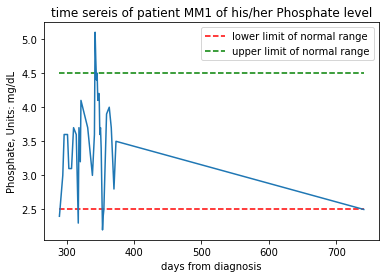

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


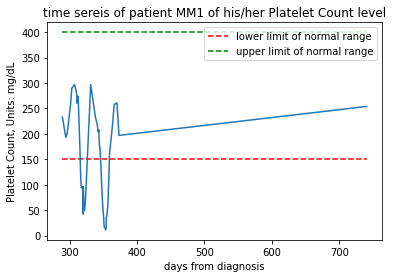

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


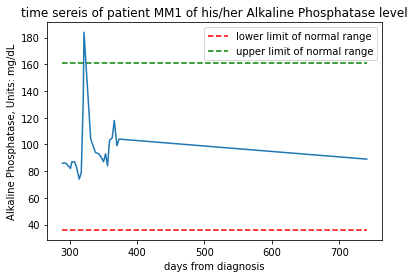

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


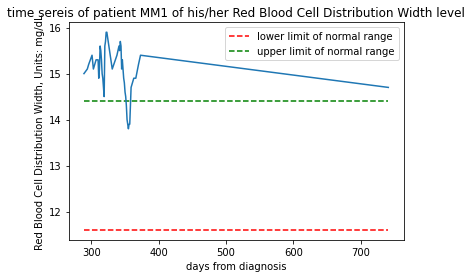

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


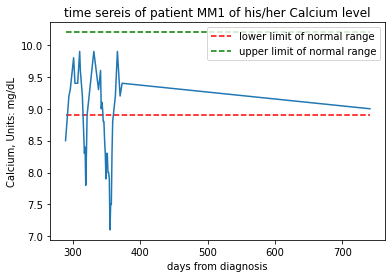

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


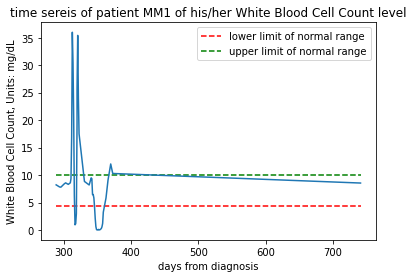

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


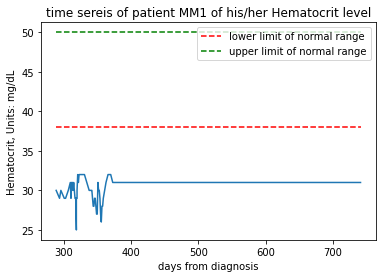

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


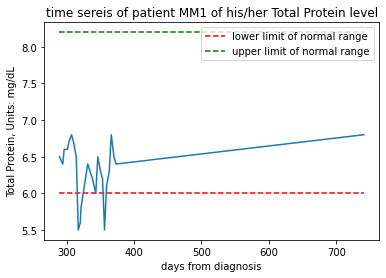

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


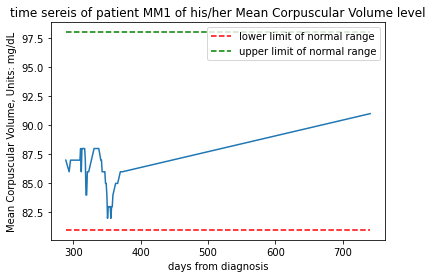

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


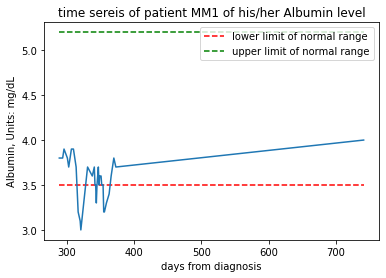

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


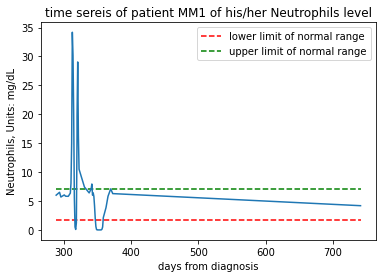

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


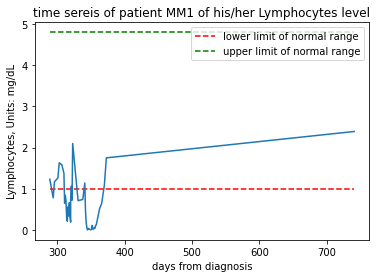

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


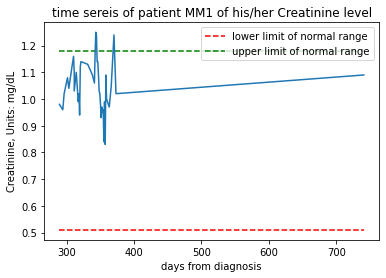

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


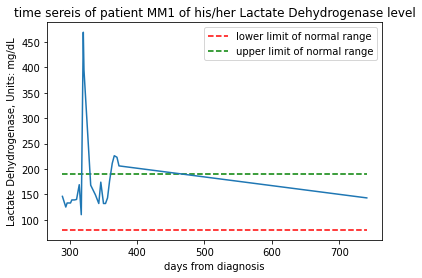

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


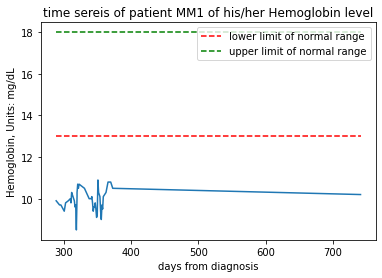

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


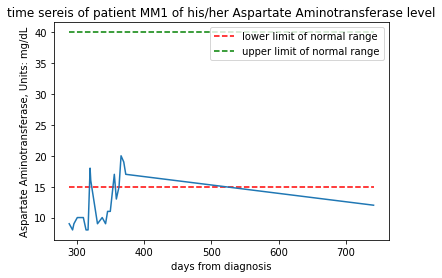

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


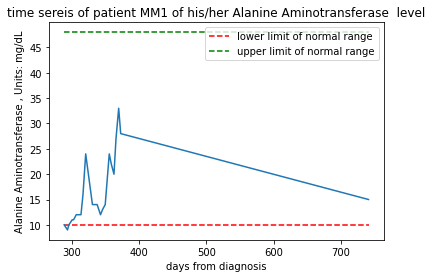

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


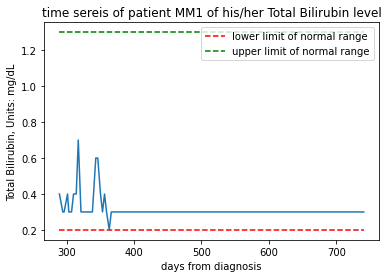

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


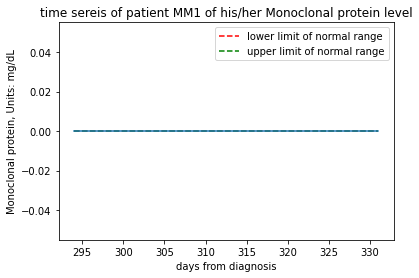

Cytomegalovirus PCR is a infectious disease, which doesn't have a timeseries


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


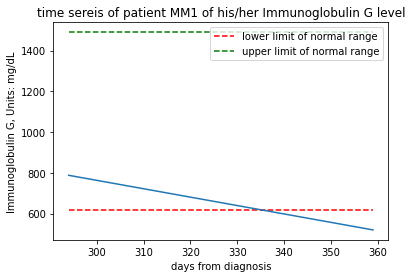

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


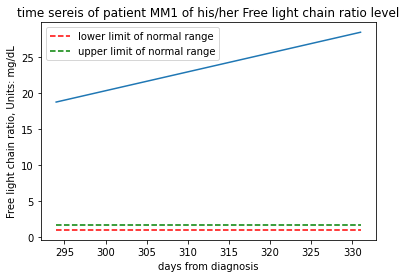

In [200]:
plotAbnormalMeasurementsOfPatient('MM1')

We can see that the following lab results are pretty important: 
- Neutrophils level
- Hematocrit
- White Blood Cell 
- Calcium Level
- Red Blood Cell Distribution Width Level
- free light chain ratio level

# 3. Explore "RadiationTherapy.csv"

In [201]:
data = pd.read_csv('RadiationTherapy.csv') 
# limited data on how much radiation therapy is applied to some patients

In [202]:
data.shape

(711, 5)

In [203]:
data.head()

,ID,DaysFromDx,RadTxTarget,RadTxTotalDose,RadTxTotalDoseUnits
0,MM2,96.0,Right humerus,2000,cGy
1,MM3,42.0,L4-S2,3000,cGy
2,MM3,42.0,C6-T4,3000,cGy
3,MM7,259.0,Total Body,200,cGy
4,MM7,2356.0,Right sacral ala,3000,cGy


In [ ]:
data['RadTxTarget'].unique()

array(['Right humerus', 'L4-S2', 'C6-T4', 'Total Body',
       'Right sacral ala', 'T9 - T11 Spine', 'Sacrum', 'L2-L4',
       'R Skull Vertex', 'R Parietal Skull Mass', 'T2-T4', 'T7-T9',
       'Left Ilium', 'L Post 7th Rib', 'Right arm', 'Bilateral femurs',
       'Sacral plasamacytoma', 'Thoracic and lumbar spine',
       'PTV of right retromolar trigone, pterygoid muscle',
       'Not specified', 'L Humerus', 'T2-T6',
       'Bilateral 7-10 ribs+Adjacent vertebrae+Spinal cord', 'Sternum',
       'Distal right humerus', 'Bilateral ribs', 'T9 - L4',
       'Right Humerus', 'Left jaw and neck', 'Right upper arm',
       'Proximal Tibia', 'Right Tibia', 'Right Fibula', 'Right Femur',
       'Left Femur', 'L2 - L5 spine', 'L1 to S1',
       'Right posterior 11th rib', 'Right rib mass', 'Right sacrum',
       'T10 spine', 'T12', 'T6-T7', 'Right chest wall', 'L2 through S1',
       'Right hip', 'C5-C6', 'Left cavernous sinus/clival lesion',
       'Left scapula', 'Thoracic spine', 'Right 

In [ ]:
data['RadTxTotalDoseUnits'].unique()

array(['cGy', 'Gy', nan], dtype=object)

Pretty hard to make sense of this dataset. I can count how many radiation therapies each patient has done

In [206]:
patientToNumOfRadTherapy = dict()
for id in data['ID']:
  if id not in patientToNumOfRadTherapy:
    patientToNumOfRadTherapy[id] = 0
  patientToNumOfRadTherapy[id] += 1

In [208]:
sorted(patientToNumOfRadTherapy.items(), key = lambda item: item[1], reverse=True)

[('MM655', 15),
 ('MM202', 14),
 ('MM514', 13),
 ('MM291', 9),
 ('MM650', 9),
 ('MM254', 8),
 ('MM110', 7),
 ('MM402', 7),
 ('MM715', 7),
 ('MM844', 6),
 ('MM113', 6),
 ('MM130', 6),
 ('MM152', 6),
 ('MM230', 6),
 ('MM400', 6),
 ('MM578', 6),
 ('MM8', 5),
 ('MM22', 5),
 ('MM849', 5),
 ('MM366', 5),
 ('MM459', 5),
 ('MM507', 5),
 ('MM533', 5),
 ('MM538', 5),
 ('MM836', 5),
 ('MM7', 4),
 ('MM173', 4),
 ('MM217', 4),
 ('MM260', 4),
 ('MM282', 4),
 ('MM315', 4),
 ('MM341', 4),
 ('MM343', 4),
 ('MM511', 4),
 ('MM586', 4),
 ('MM623', 4),
 ('MM810', 4),
 ('MM944', 4),
 ('MM10', 3),
 ('MM15', 3),
 ('MM953', 3),
 ('MM18', 3),
 ('MM924', 3),
 ('MM79', 3),
 ('MM81', 3),
 ('MM873', 3),
 ('MM947', 3),
 ('MM128', 3),
 ('MM156', 3),
 ('MM195', 3),
 ('MM205', 3),
 ('MM229', 3),
 ('MM320', 3),
 ('MM334', 3),
 ('MM897', 3),
 ('MM370', 3),
 ('MM422', 3),
 ('MM851', 3),
 ('MM453', 3),
 ('MM901', 3),
 ('MM602', 3),
 ('MM850', 3),
 ('MM689', 3),
 ('MM725', 3),
 ('MM935', 3),
 ('MM3', 2),
 ('MM21', 2),
 ('MM

Text(0, 0.5, 'number of patients')

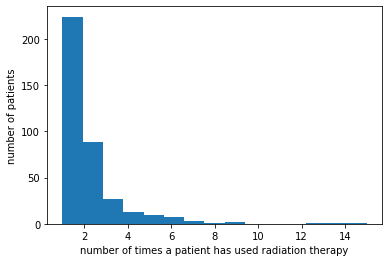

In [216]:
plt.hist(patientToNumOfRadTherapy.values(), bins = 15)
plt.xlabel('number of times a patient has used radiation therapy')
plt.ylabel('number of patients')

As we can see, most patients has used radiation therapy 1 - 3 times. A single patient has used radiation therapy 15 times! Might be interesting to find out why. 

# 4. Explore "Symptoms.csv"

In [ ]:
data = pd.read_csv('Symptoms.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.shape

(1071055, 15)

In [ ]:
data.head()

,ID,Note,DaysFromDx,Time,BeginOffset,EndOffset,Term,NegationScore,TermScore,ICD,ICDChapter,ICDSection,ICDDiagnosisI,ICDDiagnosisII,ICDDiagnosisIII
0,MM614,SCCA-OutptRecord,279,16:34:00,191,208,Abdomen distended,0.501764,0.638711,NaN,NaN,NaN,NaN,NaN,NaN
1,MM309,SCCA-OutptRecord,353,14:20:00,265,283,Abdominal bloating,NaN,0.916990,R14.0,"Symptoms, signs and abnormal clinical and labo...",Symptoms and signs involving the digestive sys...,Flatulence and related conditions,Abdominal distension (gaseous),NaN
2,MM267,SCCA-OutptRecord,195,10:40:29,699,717,Abdominal bloating,NaN,0.938848,R14.0,"Symptoms, signs and abnormal clinical and labo...",Symptoms and signs involving the digestive sys...,Flatulence and related conditions,Abdominal distension (gaseous),NaN
3,MM323,SCCA-OutptRecord,208,21:33:41,860,878,Abdominal bloating,NaN,0.937452,R14.0,"Symptoms, signs and abnormal clinical and labo...",Symptoms and signs involving the digestive sys...,Flatulence and related conditions,Abdominal distension (gaseous),NaN
4,MM342,SCCA-OutptRecord,217,18:19:00,2407,2425,Abdominal bloating,NaN,0.931571,R14.0,"Symptoms, signs and abnormal clinical and labo...",Symptoms and signs involving the digestive sys...,Flatulence and related conditions,Abdominal distension (gaseous),NaN


This dataset has a lot of texts, I am not so good with text analysis, might come back later to extract meaningful messages. **Don't know what term score means?**

# 5. Explore "BonyLesions.csv"

In [217]:
data = pd.read_csv('BonyLesions.csv')

In [219]:
data.head()

,ID,DxType,DaysFromDx,BonyLesions
0,MM1,MRI,22.0,0
1,MM1,MRI,2064.0,1
2,MM1,MRI,716.0,1
3,MM1,MRI,442.0,>3
4,MM1,MRI,251.0,0


In [221]:
data.shape

(3805, 4)

In [228]:
data[data['ID'] == 'MM1'].sort_values(by = ['DaysFromDx'])

,ID,DxType,DaysFromDx,BonyLesions
0,MM1,MRI,22.0,0
4,MM1,MRI,251.0,0
5,MM1,MRI,297.0,0
7,MM1,MRI,428.0,2
3,MM1,MRI,442.0,>3
6,MM1,MRI,701.0,>3
2,MM1,MRI,716.0,1
1,MM1,MRI,2064.0,1


In [231]:
data[data['ID'] == 'MM10'].sort_values(by = ['DaysFromDx'])

,ID,DxType,DaysFromDx,BonyLesions
46,MM10,MRI,-928.0,0
44,MM10,MRI,5.0,>3
48,MM10,MRI,31.0,>3
49,MM10,MRI,285.0,>3
47,MM10,MRI,584.0,0
45,MM10,MRI,718.0,>3


In [234]:
data[data['ID'] == 'MM55'].sort_values(by = ['DaysFromDx'])

,ID,DxType,DaysFromDx,BonyLesions
386,MM55,MRI,226.0,>3
391,MM55,MRI,292.0,0
392,MM55,MRI,347.0,>3
389,MM55,MRI,397.0,0
394,MM55,MRI,397.0,>3
398,MM55,MRI,597.0,1
385,MM55,MRI,824.0,0
384,MM55,MRI,856.0,0
387,MM55,MRI,1304.0,>3
399,MM55,MRI,1626.0,>3


As we can see, # of bony lesions of a patient can fluctuate over time, which probably indicates if the medication is working or not

# 6. Explore "Medications.csv"

In [ ]:
data = pd.read_csv('Medications.csv')

In [ ]:
data

,ID,Note,DaysFromDx,Time,BeginOffset,EndOffset,Term,NegationScore,TermScore
0,MM7,AdmitNote,1961,14:48:00,794,803,Abatacept,NaN,0.485489
1,MM7,SCCA-OutptRecord,42,17:20:00,906,912,Acacia,NaN,0.381300
2,MM55,Nutrition-OutptRecord,1633,11:07:00,834,840,Acacia,NaN,0.406916
3,MM55,Nutrition-OutptRecord,1633,11:07:00,5057,5063,Acacia,NaN,0.490309
4,MM416,Nutrition-OutptRecord,123,10:30:00,386,392,Acacia,NaN,0.350080
...,...,...,...,...,...,...,...,...,...
1303298,MM509,Neurology-InptRecord,84,11:07:00,4465,4475,Zonisamide,NaN,0.995776
1303299,MM455,SCCA-OutptRecord,180,22:21:08,4790,4799,Zopiclone,NaN,0.994309
1303300,MM455,PhysicalTherapy-OutptRecord,186,14:05:00,1729,1738,Zopiclone,NaN,0.975874
1303301,MM455,SCCA-OutptRecord,20,11:59:34,1743,1752,Zopiclone,NaN,0.991613


# 7. Explore "Signs.csv"

In [ ]:
data = pd.read_csv('Signs.csv')

In [ ]:
data.head()

,ID,Note,DaysFromDx,Time,BeginOffset,EndOffset,Term,NegationScore,TermScore,ICD,ICDChapter,ICDSection,ICDDiagnosisI,ICDDiagnosisII,ICDDiagnosisIII
0,MM596,OncologyNursing-Outpt,1119,08:34:00,652,670,Abdominal bloating,0.945748,0.601333,R14.0,"Symptoms, signs and abnormal clinical and labo...",Symptoms and signs involving the digestive sys...,Flatulence and related conditions,Abdominal distension (gaseous),NaN
1,MM106,HematologyOncology-InptRecord,4425,16:09:00,2143,2162,Abdominal breathing,NaN,0.942551,NaN,NaN,NaN,NaN,NaN,NaN
2,MM106,HematologyOncology-InptRecord,4424,22:10:00,2623,2642,Abdominal breathing,NaN,0.942562,NaN,NaN,NaN,NaN,NaN,NaN
3,MM106,ICU-InptRecord,4433,06:56:00,7676,7695,Abdominal breathing,NaN,0.896307,NaN,NaN,NaN,NaN,NaN,NaN
4,MM106,Nephrology-InptRecord,4419,10:59:00,1660,1679,Abdominal breathing,NaN,0.916967,NaN,NaN,NaN,NaN,NaN,NaN


# 8. Explore "Demographics.csv"

In [235]:
data = pd.read_csv('Demographics.csv')

In [236]:
data.head()

,ID,AgeAtDx,PatientSex,RacialGroup
0,MM1,67,Male,White
1,MM2,61,Male,Black
2,MM3,59,Male,White
3,MM4,68,Female,White
4,MM5,63,Male,White


In [237]:
data.shape # so we have 800+ patients in total.

(831, 4)

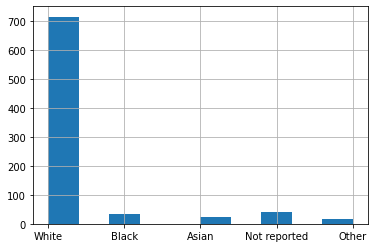

In [238]:
data['RacialGroup'].hist()

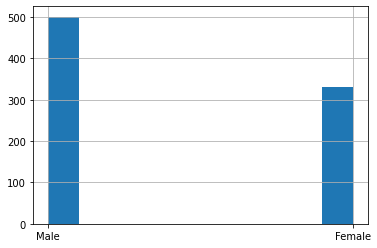

In [239]:
data['PatientSex'].hist()

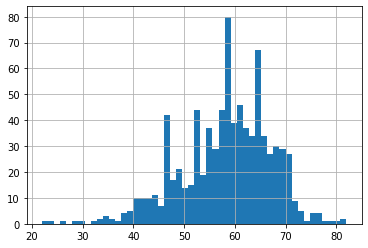

In [242]:
data['AgeAtDx'].hist(bins = 50)

- As we can see from these plots, age in which patient is diagnosed is primarily clustered around 50 - 70 years old
- There are about 60% of patients who are males and 40% females
- Majority of patients (~ 80 - 90 %) are white, why????


# 9. Explore "MyelomaTherapy.csv"

In [243]:
data = pd.read_csv('MyelomaTherapy.csv')

In [244]:
data.head()

,ID,MedTx,Combination,Class,Mechanism,DaysFromDxStart,DaysFromDxStop,Line,Duration,TreatmentPhase
0,MM1,Bortezomib,VRD,Proteosome inhibitor,Proteosome inhibitor,116.0,260.0,1,195.0,Induction
1,MM1,Dexamethasone,VRD,Steroid,Steroid,116.0,260.0,1,195.0,Induction
2,MM1,Lenalidomide,VRD,Immunotherapy,Immunomodulatory,116.0,260.0,1,195.0,Induction
3,MM1,Cyclophosphamide,Not specified,Chemotherapy,Alkylator,311.0,311.0,2,32.0,Induction
4,MM1,Dexamethasone,Not specified,Steroid,Steroid,311.0,299.0,2,32.0,Induction


In [245]:
# all possible medications.
data['MedTx'].unique()

array(['Bortezomib', 'Dexamethasone', 'Lenalidomide', 'Cyclophosphamide',
       'Stem cell transplant', 'Carfilzomib', 'Thalidomide',
       'Liposomal doxorubicin', 'Doxorubicin ', 'Etoposide',
       'Methotrexate', 'Rituximab', 'Ixazomib', 'Pomalidomide',
       'Doxorubicin', 'Cisplatin', 'Prednisone', 'Yttrium-90',
       'Adriamycin', 'Vincristine', 'Methylprednisolone', 'Daratumumab',
       'Lucatumumab', 'Anti-DKK1', 'Cytarabine', 'Melphalan',
       'Isatuximab', 'Ricolinostat', 'Elotuzumab', 'Bendamustine',
       'Ulocuplumab', 'Plerixafor', 'Interferon', 'Interferon alpha',
       'G-CSF', 'Pembrolizumab', 'Paciltaxel', 'Venetoclax', 'Anti-CD38',
       'LGH447', 'Alpelisib', 'Donor lymphocyte infusion', 'SNS01-T',
       'Ibrutinib', 'Gamma secretase inhibitor', 'Anti-BCMA CAR-T',
       'Vorinostat', 'SGN-CD352A', 'Panobinostat', 'Erlotinib',
       'Anti-Huluc63', 'GSK2857916', 'Thiotepa', 'MDX1338', 'Decitabine',
       'Anti-FGFR3', 'TTI-621', 'Fludarabine', 'SEA-BCM

In [246]:
# all possible medication classes
data['Class'].unique()

array(['Proteosome inhibitor', 'Steroid', 'Immunotherapy', 'Chemotherapy',
       'Stem Cell Transplant', 'Radioimmunotherapy',
       'Epigenetic modifier', 'Mobilization', 'Small molecule inhibitor',
       'Gamma secretase inhibitor'], dtype=object)

In [247]:
data['TreatmentPhase'].unique()

array(['Induction', 'Stem cell transplant', 'Maintenance', 'Relapse'],
      dtype=object)

As we can see there are about 100 medications available, in 10 different classes.

# 10. Explore "PlasmaCells.csv"

In [ ]:
data = pd.read_csv('PlasmaCells.csv')

In [ ]:
data.head()

,ID,ObservationId,DaysFromDx,ObservationValue
0,MM1,Bone marrow plasma cells,707,2.000
1,MM1,Blood plasma cells,319,0.007
2,MM1,Bone marrow plasma cells,2074,14.600
3,MM1,Bone marrow plasma cells,294,10.000
4,MM1,Bone marrow plasma cells,0,8.500


# 11. Explore "SurvivalDays.csv"

In [248]:
data = pd.read_csv('SurvivalDays.csv')

In [249]:
data.head()

,ID,YearOfDx,SurvivalDays,Status
0,MM1,2011,2841.0,Unknown
1,MM2,2010,1603.0,Unknown
2,MM3,2016,1104.0,Alive
3,MM4,2014,1802.0,Unknown
4,MM5,2008,1841.0,Dead


In [250]:
data.shape

(811, 4)

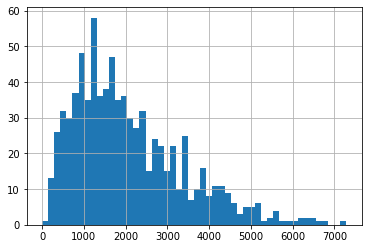

In [253]:
data['SurvivalDays'].hist(bins = 50)

In [254]:
data['SurvivalDays'].mean()

2078.7641975308643

Mean survival years of this cancer is about 5 - 6 years

# Conclusion

There are some stuff we have discovered:
- our main group of patients are white. (Why is that?)
- people are typically 50 - 70 years old when diagnosed.
- main survival years = 5 - 6 years
- some lab results seem to be indicative of the disease.

Future analysis directions:
- what features correlates with low/high survival duration?
- how to make sense of medical notes data and diagnosis? (mainly in textual forms)
- predictive modeling of survival using machine learning.